# Data Toolkit Assignment

1. What is the difference between multithreading and multiprocessing?
  - The main difference between multithreading and multiprocessing lies in how they achieve parallelism and how they use system resources. Here’s a clear comparison:

     * Feature
        * Definition
        * Memory  
        * Communication
        * Overhead  
        * Parallelism  
        * Use cases
        * Failure isolation
        * Speed

     * Multithreading
        * Multiple threads run in the same process
        * Threads share the same memory space
        * Easier (shared memory)
        * Lightweight
        * lower overhead
        * Often limited by the Global Interpreter Lock (GIL) in languages like Python (true parallelism limited)
        * I/O-bound tasks (e.g., network requests, file I/O)
        * A crash in one thread can affect the whole process
        * Faster to start and switch between threads

      * Multiprocessing
        * Multiple processes run independently
        * Each process has its own memory space
        * More complex (requires inter-process communication, e.g., pipes, queues).
        * Heavier, more overhead due to separate memory and process creation
        * True parallelism — each process can run on a different CPU core   
        * CPU-bound tasks (e.g., data processing, image rendering)
        * A crash in one process usually doesn’t affect others
        * Slower to start due to process creation overhead

     * Example
        * Multithreading: A web server handling thousands of concurrent client requests.
        * Multiprocessing: A machine learning program training on multiple CPU cores.        

2. What are the challenges associated with memory management in Python?
  - memory management in Python is mostly automatic (thanks to the built-in garbage collector), but it comes with some important challenges that developers need to understand to avoid memory leaks or inefficiency.        

    * Reference Counting and Garbage Collection
       * Python uses reference counting as its primary memory management technique.
       * Every object keeps track of how many references point to it.
       * When the reference count drops to zero, the object is deleted.
    * Challenge
       * Reference cycles (e.g., object A refers to B and B refers back to A) can prevent automatic cleanup by reference counting.
       * Python’s cyclic garbage collector can handle this, but it introduces overhead and isn’t always perfect   

    * Memory Leaks from Circular Reference
       * If objects reference each other in a cycle and also define __del__ destructors, Python may not collect them automatically.
       * Such objects stay in memory until the program ends, causing leaks.

    * Fragmentation of Memory
       * Python maintains its own memory allocator (PyMalloc) on top of the OS memory.
       * Even if objects are freed, fragmentation can occur — freed memory might not be returned to the OS immediately.
       * Long-running processes can end up using more memory than needed.      

    * Global Interpreter Lock (GIL) Impact
      * The GIL allows only one thread to execute Python bytecode at a time.
    * This can cause:
      * Inefficient memory usage in multithreaded programs.
      * Threads holding onto memory longer than expected.   

    * Unreleased External Resources
      * Objects that manage external resources (like files, sockets, or database connections) may not release memory if not properly closed.
      * Relying on garbage collection for cleanup is risky — finalization time is unpredictable.  

    * Large Object Retention
       * Large data structures (e.g., lists, dictionaries, NumPy arrays) can consume a lot of memory.
       * Even after clearing data, containers may not shrink automatically (e.g., a list keeps allocated capacity).
       * This can lead to memory bloat over time.  

     * Hidden References & Caches
       * Unlike lower-level languages, Python abstracts memory away from the developer.
       * When a memory leak occurs, finding the root cause can be hard.
       * Tools like tracemalloc, gc module, or external profilers are often required.  

3. Write a Python program that logs an error message to a log file when a
division by zero exception occurs?

In [ ]:
import logging

logging.basicConfig(
    filename='error_log.txt',            # Log file name
    level=logging.ERROR,                # Log only errors and above
    format='%(asctime)s - %(levelname)s - %(message)s'  # Log format
)

def divide_numbers(a, b):
    try:
        result = a / b
        print(f"The result is: {result}")
    except ZeroDivisionError as e:
        logging.error(f"Division by zero error: {e}")
        print("An error occurred. Check the log file for details.")

# Example usage
x = 10
y = 0
divide_numbers(x, y)


ERROR:root:Division by zero error: division by zero


An error occurred. Check the log file for details.


4. Write a Python program that reads from one file and writes its content to
another file?


In [ ]:
# Program to copy content from one file to another

# Specify the source and destination file names
source_file = "source.txt"
destination_file = "destination.txt"

try:
    # Open the source file in read mode and destination file in write mode
    with open(source_file, 'r') as src:
        content = src.read()

    with open(destination_file, 'w') as dest:
        dest.write(content)

    print(f"Content copied from '{source_file}' to '{destination_file}' successfully!")

except FileNotFoundError:
    print(f"Error: The file '{source_file}' does not exist.")
except Exception as e:
    print(f"An error occurred: {e}")


Error: The file 'source.txt' does not exist.


5. Write a program that handles both IndexError and KeyError using a
try-except block?

In [ ]:
# Program to handle IndexError and KeyError

my_list = [10, 20, 30]
my_dict = {"a": 1, "b": 2, "c": 3}

try:
    # This will cause an IndexError if the index is out of range
    print("Accessing list element:", my_list[5])

    # This will cause a KeyError if the key doesn't exist
    print("Accessing dictionary value:", my_dict["z"])

except IndexError:
    print("Error: Tried to access an index that doesn't exist in the list.")

except KeyError:
    print("Error: Tried to access a key that doesn't exist in the dictionary.")


Error: Tried to access an index that doesn't exist in the list.


6. What are the differences between NumPy arrays and Python lists?
  - the differences between NumPy arrays and Python are:

      * Feature
        * Type of data
        * Performance
        * Memory usage
        * Mathematical operation
        * Functionality
        * Dimensionality
        * Speed
        * Type enforcement
        * Broadcasting

      * Python List
        * Can store different data types in one list
        * Slower for numerical operations
        * Consumes more memory due to dynamic typing
        * Not directly supported. You must loop manually
        * Limited built-in functionality for math
        * 1D (list of lists for multi-dimensional)
        * Iteration is interpreted in Python
        * Can mix types (e.g., int + str)
        * Not supported

     * NumPy Array
        * Stores elements of the same data type (homogeneous)
        * Much faster, as operations are done in compiled C code
        * Uses less memory — more compact and efficient
        * Supports vectorized operations (e.g., a + b, a * 2)
        * Rich library for linear algebra, statistics, FFT, etc
        * Supports multi-dimensional arrays (e.g., 2D, 3D)
        * Computation is done in low-level C, so it’s much faster
        * All elements must be the same type — ensures consistency
        * Supports broadcasting for arithmetic operations

     * Example      

In [ ]:
# Using a Python list
my_list = [1, 2, 3, 4]
result_list = [x * 2 for x in my_list]
print("List result:", result_list)

# Using a NumPy array
import numpy as np
my_array = np.array([1, 2, 3, 4])
result_array = my_array * 2
print("NumPy array result:", result_array)

List result: [2, 4, 6, 8]
NumPy array result: [2 4 6 8]


In [ ]:
import numpy as np
import time

# Python list
lst = list(range(1000000))
start = time.time()
lst = [x * 2 for x in lst]
print("List time:", time.time() - start)

# NumPy array
arr = np.arange(1000000)
start = time.time()
arr = arr * 2
print("NumPy time:", time.time() - start)


List time: 0.24616718292236328
NumPy time: 0.005019664764404297


7. Explain the difference between apply() and map() in Pandas?
  - the difference between apply() and map() in Pandas are:
    
      * Feature
        * Main usage
        * Applies function to
        * Return type
        * Accepted input
        * Flexibility
        * Axis parameter

      * map()
        * Used with Series (1D)
        * Each element in a Series
        * Returns a new Series
        * Function, dictionary, or Series
        * Simple transformations
        * No axis parameter — works only on a single Series

      * apply()    
        * Used with both Series and DataFrame (1D or 2D)
        * A function to each element (Series) or row/column (DataFrame)
        * Returns a Series or DataFrame, depending on the axis and function
        * Function (can be a custom function, NumPy function, or built-in function)
        * More flexible — can handle complex row/column-wise operations
        * axis=0 for column-wise and axis=1 for row-wise operations in a DataFrame

      * Example : Using map() on a Series    

In [ ]:
import pandas as pd

s = pd.Series([1, 2, 3, 4])

# Using map with a function
print(s.map(lambda x: x * 2))

# Using map with a dictionary
print(s.map({1: 'A', 2: 'B', 3: 'C'}))


0    2
1    4
2    6
3    8
dtype: int64
0      A
1      B
2      C
3    NaN
dtype: object


  - Example: Using apply() on a Series

In [ ]:
# apply works similarly on a Series
print(s.apply(lambda x: x ** 2))


0     1
1     4
2     9
3    16
dtype: int64


 - Example: Using apply() on a DataFrame

In [ ]:
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [10, 20, 30]
})

# Apply a function to each column
print(df.apply(sum, axis=0))

# Apply a function to each row
print(df.apply(lambda row: row['A'] + row['B'], axis=1))


A     6
B    60
dtype: int64
0    11
1    22
2    33
dtype: int64


8. Create a histogram using Seaborn to visualize a distribution.
  

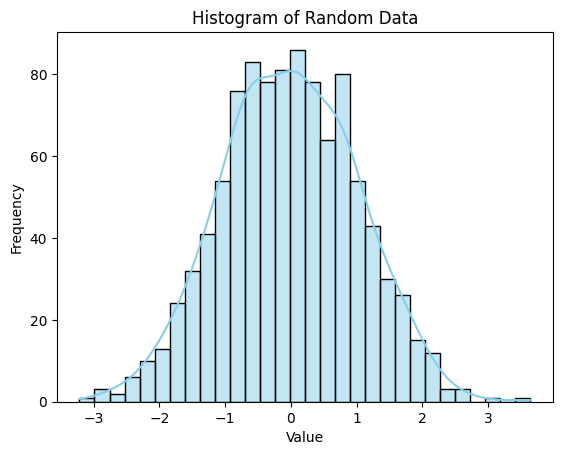

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data (e.g., normal distribution)
data = np.random.randn(1000)  # 1000 data points

# Create a histogram using Seaborn
sns.histplot(data, bins=30, kde=True, color='skyblue')

# Add titles and labels
plt.title('Histogram of Random Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Display the plot
plt.show()


9. Use Pandas to load a CSV file and display its first 5 rows.


In [ ]:
import pandas as pd

# Load the CSV file (replace 'data.csv' with your actual filename or path)
df = pd.read_csv('data.csv')

# Display the first 5 rows of the dataset
print(df.head(5))


    this is my first line
0  this is my second line
1   this is my third line
2  this is my fourth line
3   this is my fifth line
4   this is my sixth line


10. Calculate the correlation matrix using Seaborn and visualize it with a
heatmap.


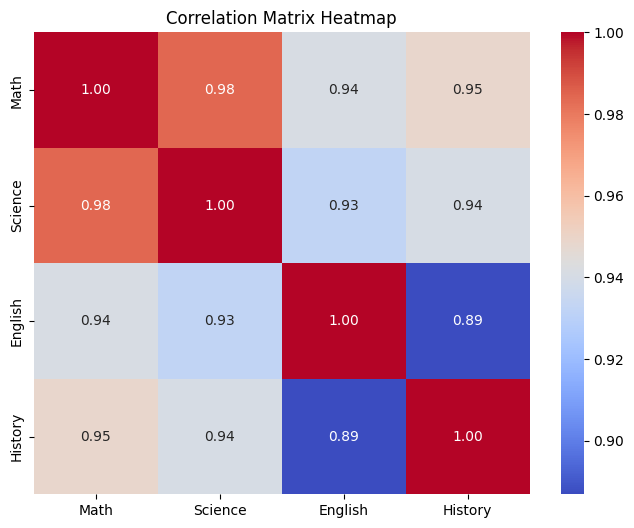

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Load a CSV file (replace with your file)
# df = pd.read_csv('data.csv')

# For demonstration, let's create a sample DataFrame
data = {
    'Math': [85, 78, 92, 65, 89],
    'Science': [88, 76, 95, 67, 90],
    'English': [80, 75, 85, 70, 88],
    'History': [70, 68, 82, 60, 75]
}
df = pd.DataFrame(data)

# 1. Calculate the correlation matrix
corr_matrix = df.corr()

# 2. Create a heatmap to visualize the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()
